# Study Buddy
## Study buddy is a study bot which helps users improve their problem solving speed and accuracy.
1. It generates random aptitude questions and gives four options to that question.
2. The user is required to enter the correct option to that answer.
3. The user will be marked on its speed as well as on its accuracy.
4. After the test ends Analysis report of the test will be generated.
5. After couple of tries the user will also be able to view the overall performance graph.

Enter your name:a
Howdy a 🤠! welcome to study bot.
A bot which helps you improve your aptitude!
You will be asked 5 questions
Your goal is to get the correct answer and mark the corresponding option to the question.
when ready press enter to start: 

Question 1
40 % of 350 = ?
A] 128
B] 148
C] 144
D] 140
Your Answer: d
correct! 😀
you took 6.39 seconds and your score is 1

Question 2
90 % of 800 = ?
A] 729
B] 702
C] 711
D] 720
Your Answer: d
correct! 😀
you took 4.06 seconds and your score is 2

Question 3
30 % of 910 = ?
A] 282
B] 267
C] 273
D] 288
Your Answer: b
close! the correct answer was C 😮
you took 4.12 seconds and your score is 2

Question 4
70 % of 510 = ?
A] 357
B] 343
C] 364
D] 371
Your Answer: a
correct! 😀
you took 6.16 seconds and your score is 3

Question 5
60 % of 930 = ?
A] 570
B] 558
C] 564
D] 552
Your Answer: b
correct! 😀
you took 5.21 seconds and your score is 4

              ANALYSIS             
Number of questions solved: 5
Your Score: 4/5
Your accuracy is: 80.0 %

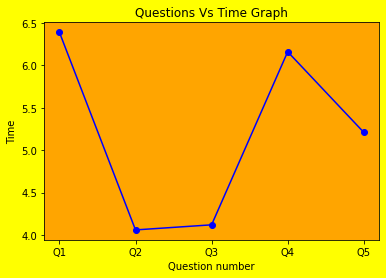

Do you want to get the overall feedback?
Press y for yes:y

              FEEDBACK             
mean Time: 7.76 seconds
Good job! Your accuracy is excellent and 
your average time to solve a question is also less.
 
Your accuracy is: 80.0 %
Your average time: 5.19 seconds


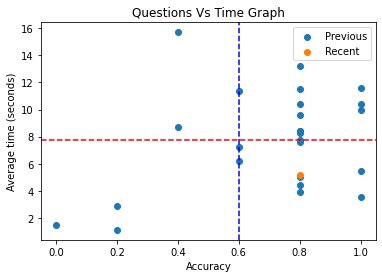

Press 'Y' to try again: n


In [1]:
"""
A study bot which helps to measure the problem solving speed and accuracy of the learner
by posting random problems from mathematics, aptitude etc. and plot a graph specifing the 
time taken and accuracy of the learner and showing points where the user needs to improve.

"""
import random
import time
import datetime
import csv
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#declaring global variables
PERCENTAGE_QUE = 5
HCF_QUE = 5
option_list = ['A','B','C','D']
ans_list = []
time_list = []
 
def percentage_easy(que_num,score):
    """
    1] print the question number
    2] print the question and the four options
    3] ask the user for the answer and wait till the user answers
    4] repeat the process for the next question
    """
    for i in range (PERCENTAGE_QUE):
        que_num += 1
        print("\nQuestion",que_num)
        percent = random.randrange(10,100,10)
        percent_of = random.randrange(200,1000,10)
        print(str(percent),'% of',str(percent_of),'= ?')
        answer = int(percent * 0.01 * percent_of)
        options = [answer]
        while len(options) < 4 :
            x = random.randrange(answer-18,answer+18)
            if (x % (percent*0.1) == 0 or x % (percent_of*0.1) == 0):
                if x not in options:
                    options.append(x)
        #generate options dictionary
        options_dict = generate_options(options)
        # get the correct option number
        correct_option = get_correct_option(options_dict,answer)
        #pass the score, options dictionary and the answer, and get the input from the user
        time_list,score = get_input(correct_option,score)
        # create a list of correct options
        ans_list.append(correct_option)
    return que_num,time_list,score

def hcf(que_num,score):
    num = HCF_QUE
    while(num > 0):
        answer = random.randint(2, 12)
        x = random.randint(2, 20)
        y = random.randint(2, 20)

        if(x > y):
            for i in range(2, y+1):
                if (x % i == 0 and y % i == 0):
                    answer *= i

        elif(y > x):
            for i in range(2, x+1):
                if (x % i == 0 and y % i == 0):
                    answer *= i
        
        if not(x == y or answer > 12):
            print("\nQuestion",que_num)
            x = answer*x
            y = answer*y

            print("the HCF of", str(x), ",", str(y), "is", str(answer))
            num -= 1

def generate_options(options):
    """
    input: The options to the questions in a list form.
    output: A dictionary with the option number as key and the options as its value
    """
    # shuffle the option number
    random.shuffle(options)
    #create a options dictionary
    options_dict = {}
    for key in option_list:
        for value in options:
            options_dict[key] = value
            options.remove(value)
            break
    # print the options
    for key in options_dict:
        print(key+']',options_dict[key])
    return options_dict

def get_correct_option(options_dict,answer):
    """
    Function to get the option to the correct answer.
    pass in the options dictionary,and the answer.
    input: The options dictionary and the correct answer.
    output: checks which option has the correct value and returns that option 
    """
    for key in options_dict:
        if options_dict[key] == answer:
            correct_option = key   
    ans_list.append(correct_option)
    return correct_option


def get_input(correct_option,score):
    """
    Function to get the input and return the score.
    input: Gets the correct option as input from the user.
    output: returns the score as well as a list of time taken for each question.
    """
    initial = float("{:.2f}".format(time.time()))
    user_ans = input(("Your Answer: ")).upper()
    # compare the correct answer with the user input and if answered correctly increase their score.   
    while user_ans not in option_list:
        user_ans = input(("Please input A, B, C or D: ")).upper()
    if user_ans == correct_option: 
        print("correct! 😀")
        score+=1
    else:
        print('close! the correct answer was',correct_option,"😮")
    time_taken = float("{:.2f}".format(time.time()-initial))
    print("you took",str(time_taken),"seconds and your score is",str(score))
    time_list.append(time_taken)
    time.sleep(2)
    return time_list,score


def plot_graph(que_list,time_list):
    """
    plots the graph with input as lists.
    input: questions list and the list of time taken to solve each question.
    output: graph of questions Vs time taken.
    """
    plt.figure(facecolor='yellow')  
    plt.title("Questions Vs Time Graph")
    plt.plot(que_list,time_list,linestyle='-', marker='o', color='b') 
    plt.xlabel('Question number')
    ax = plt.axes()
    ax.set_facecolor("orange")
    plt.ylabel('Time')
    plt.savefig("Test_analysis.png")
    plt.show()

def write_data(que_num,score,time_list):
    """
    This function writes data to the data.csv file each time the user is finished with the test
    Input: the question number, the overall score, and the time list.
    output: stores values in data.csv file.
    """
    time_stamp = datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S')
    accuracy = float("{:.2f}".format(score/que_num))
    total_time = 0
    for i in time_list:
        total_time += i
    total_time = float("{:.2f}".format(total_time))
    average_time = float("{:.2f}".format(total_time/que_num))
    fields = [time_stamp,que_num,score,accuracy,total_time,average_time]
    analysis(que_num,score,total_time,accuracy,average_time)
    que_list = question_list(time_list)
    plot_graph(que_list,time_list)
    user_ans = input("Do you want to get the overall feedback?\nPress y for yes:").upper()
    if user_ans == "Y":
        print("\n              FEEDBACK             ")  
        give_feedback(accuracy,average_time) 
    with open("data.csv", 'a',newline='') as f:
        writer = csv.writer(f)
        writer.writerow(fields)
    again = input("Press 'Y' to try again: ").upper()
    if again == 'Y':
        main()

def question_list(time_list):
    """
    Generates a list of Que numbers [Q1, Q2 ...]
    """
    que_list = []
    for i in range(len(time_list)):
        que_list.append('Q'+ str(i+1))    
    return que_list

def analysis(que_num,score,total_time,accuracy,average_time):
    """
    Gives the analysis of the test
    """
    print("\n              ANALYSIS             ")
    print("Number of questions solved:",str(que_num))    
    print("Your Score:",str(score)+"/"+str(que_num))    
    print("Your accuracy is:",str(accuracy * 100),'%')
    print("Time taken to solve:",str(total_time)+" seconds") 
    print("Average time taken per question:",str(average_time)+" seconds")
    print("Least time:",str(min(time_list))+" seconds")
    print("Most time:",str(max(time_list))+" seconds")
    
def give_feedback(accuracy,average_time):
    """
    Feedback:
    Mastery stage : accuracy above 0.6 and average time above mean time.
    Starting stage: accuracy below 0.4 and average time below mean time.
    learning Stage: accuracy > 0.6 but average time < mean time.
    Overconfident stage: accuracy < 0.6 but average time > mean time. 
    """
    df = pd.read_csv('data.csv')
    mean_time = df['average time taken'].mean()
    mean_time =float("{:.2f}".format(mean_time))
    print("mean Time:",str(mean_time),'seconds')
    if accuracy >= 0.6 and average_time <= mean_time:
        print("Good job! Your accuracy is excellent and \nyour average time to solve a question is also less.")
    elif accuracy >= 0.6 and average_time > mean_time:
        print("Very Good, you are getting clear on your concepts and \nhave a good accuracy, slowly you will improve with your timing.")
    elif accuracy < 0.6 and average_time < mean_time:
        print("No need to hurry, dont focus too much on the time. \nfirst get a grip on your concepts and then improve on your timing.")
    else:
        print("No one is perfect, Initially you dont need to worry about the timing, \nyou need to improve on your accuracy first.")
    print(" ")
    print("Your accuracy is:",str(accuracy * 100),'%')
    print("Your average time:",str(average_time)+" seconds")
    plt.title("Questions Vs Time Graph")
    plt.scatter(df['accuracy'],df['average time taken'])
    plt.scatter(accuracy,average_time)
    plt.legend(["Previous", "Recent"])
    plt.axhline(y= mean_time, color='r', linestyle='--')
    plt.axvline(x= 0.6, color='b', linestyle='--')
    plt.xlabel("Accuracy")
    plt.ylabel("Average time (seconds)")
    plt.savefig("Overall_analysis.png")
    plt.show()
    
def study_bot():
    """
    Used to initiate type of questions and like so new type of questions can be added.
    """
    que_num = 0
    score = 0
    que_num,time_list,score = percentage_easy(que_num,score)
    write_data(que_num,score,time_list)

def main():
    name = input("Enter your name:")
    print("Howdy",name+" 🤠! welcome to study bot.\nA bot which helps you improve your aptitude!")
    print("You will be asked",str(PERCENTAGE_QUE),"questions")
    print("Your goal is to get the correct answer and mark the corresponding option to the question.")
    ready = input("when ready press enter to start: ").upper()
    while (ready != ''):
        ready = input("when ready press enter to start: ").upper()
    study_bot()
    
if __name__ == '__main__':
    main()
